In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [11]:
data = pd.read_csv("/home/olga/Documents/teaching/machine_Learning/kaggle/hause_pricing/data/train.csv", index_col=0)

# 1 стандартные графики

In [2]:
y = [1,3,5,6,7,8,10,11]
x = [1,2,3,5,6,9,10,15]

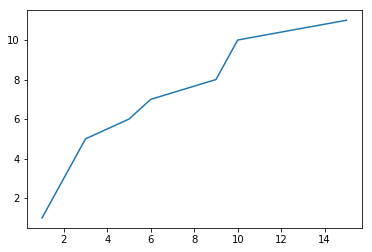

In [6]:
plt.plot(x, y)
plt.show()

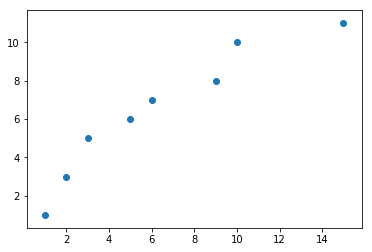

In [8]:
plt.plot(x, y, '.')
plt.scatter(x,y)
plt.show()

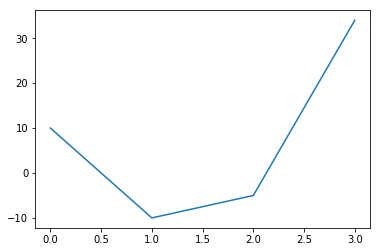

In [11]:
y = [10 , -10, -5, 34]
plt.plot(y)
plt.show()

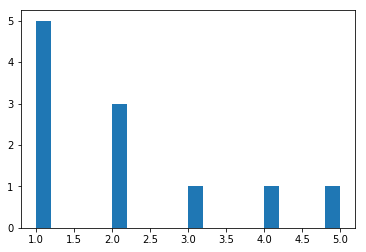

In [15]:
x = [1,1,1,1,1,2,2,2,3,4,5]
plt.hist(x,bins=20)
plt.show()

# 2 Оформление

### 2.1 Очевидные вещи.

не забывай:
  * подписи осей
  * легенду
  * название графика (если неочевидно из подписей очей)

  
через пару недель ты будешь себе за это благодарен
  

### 2.2. пример
    
http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/

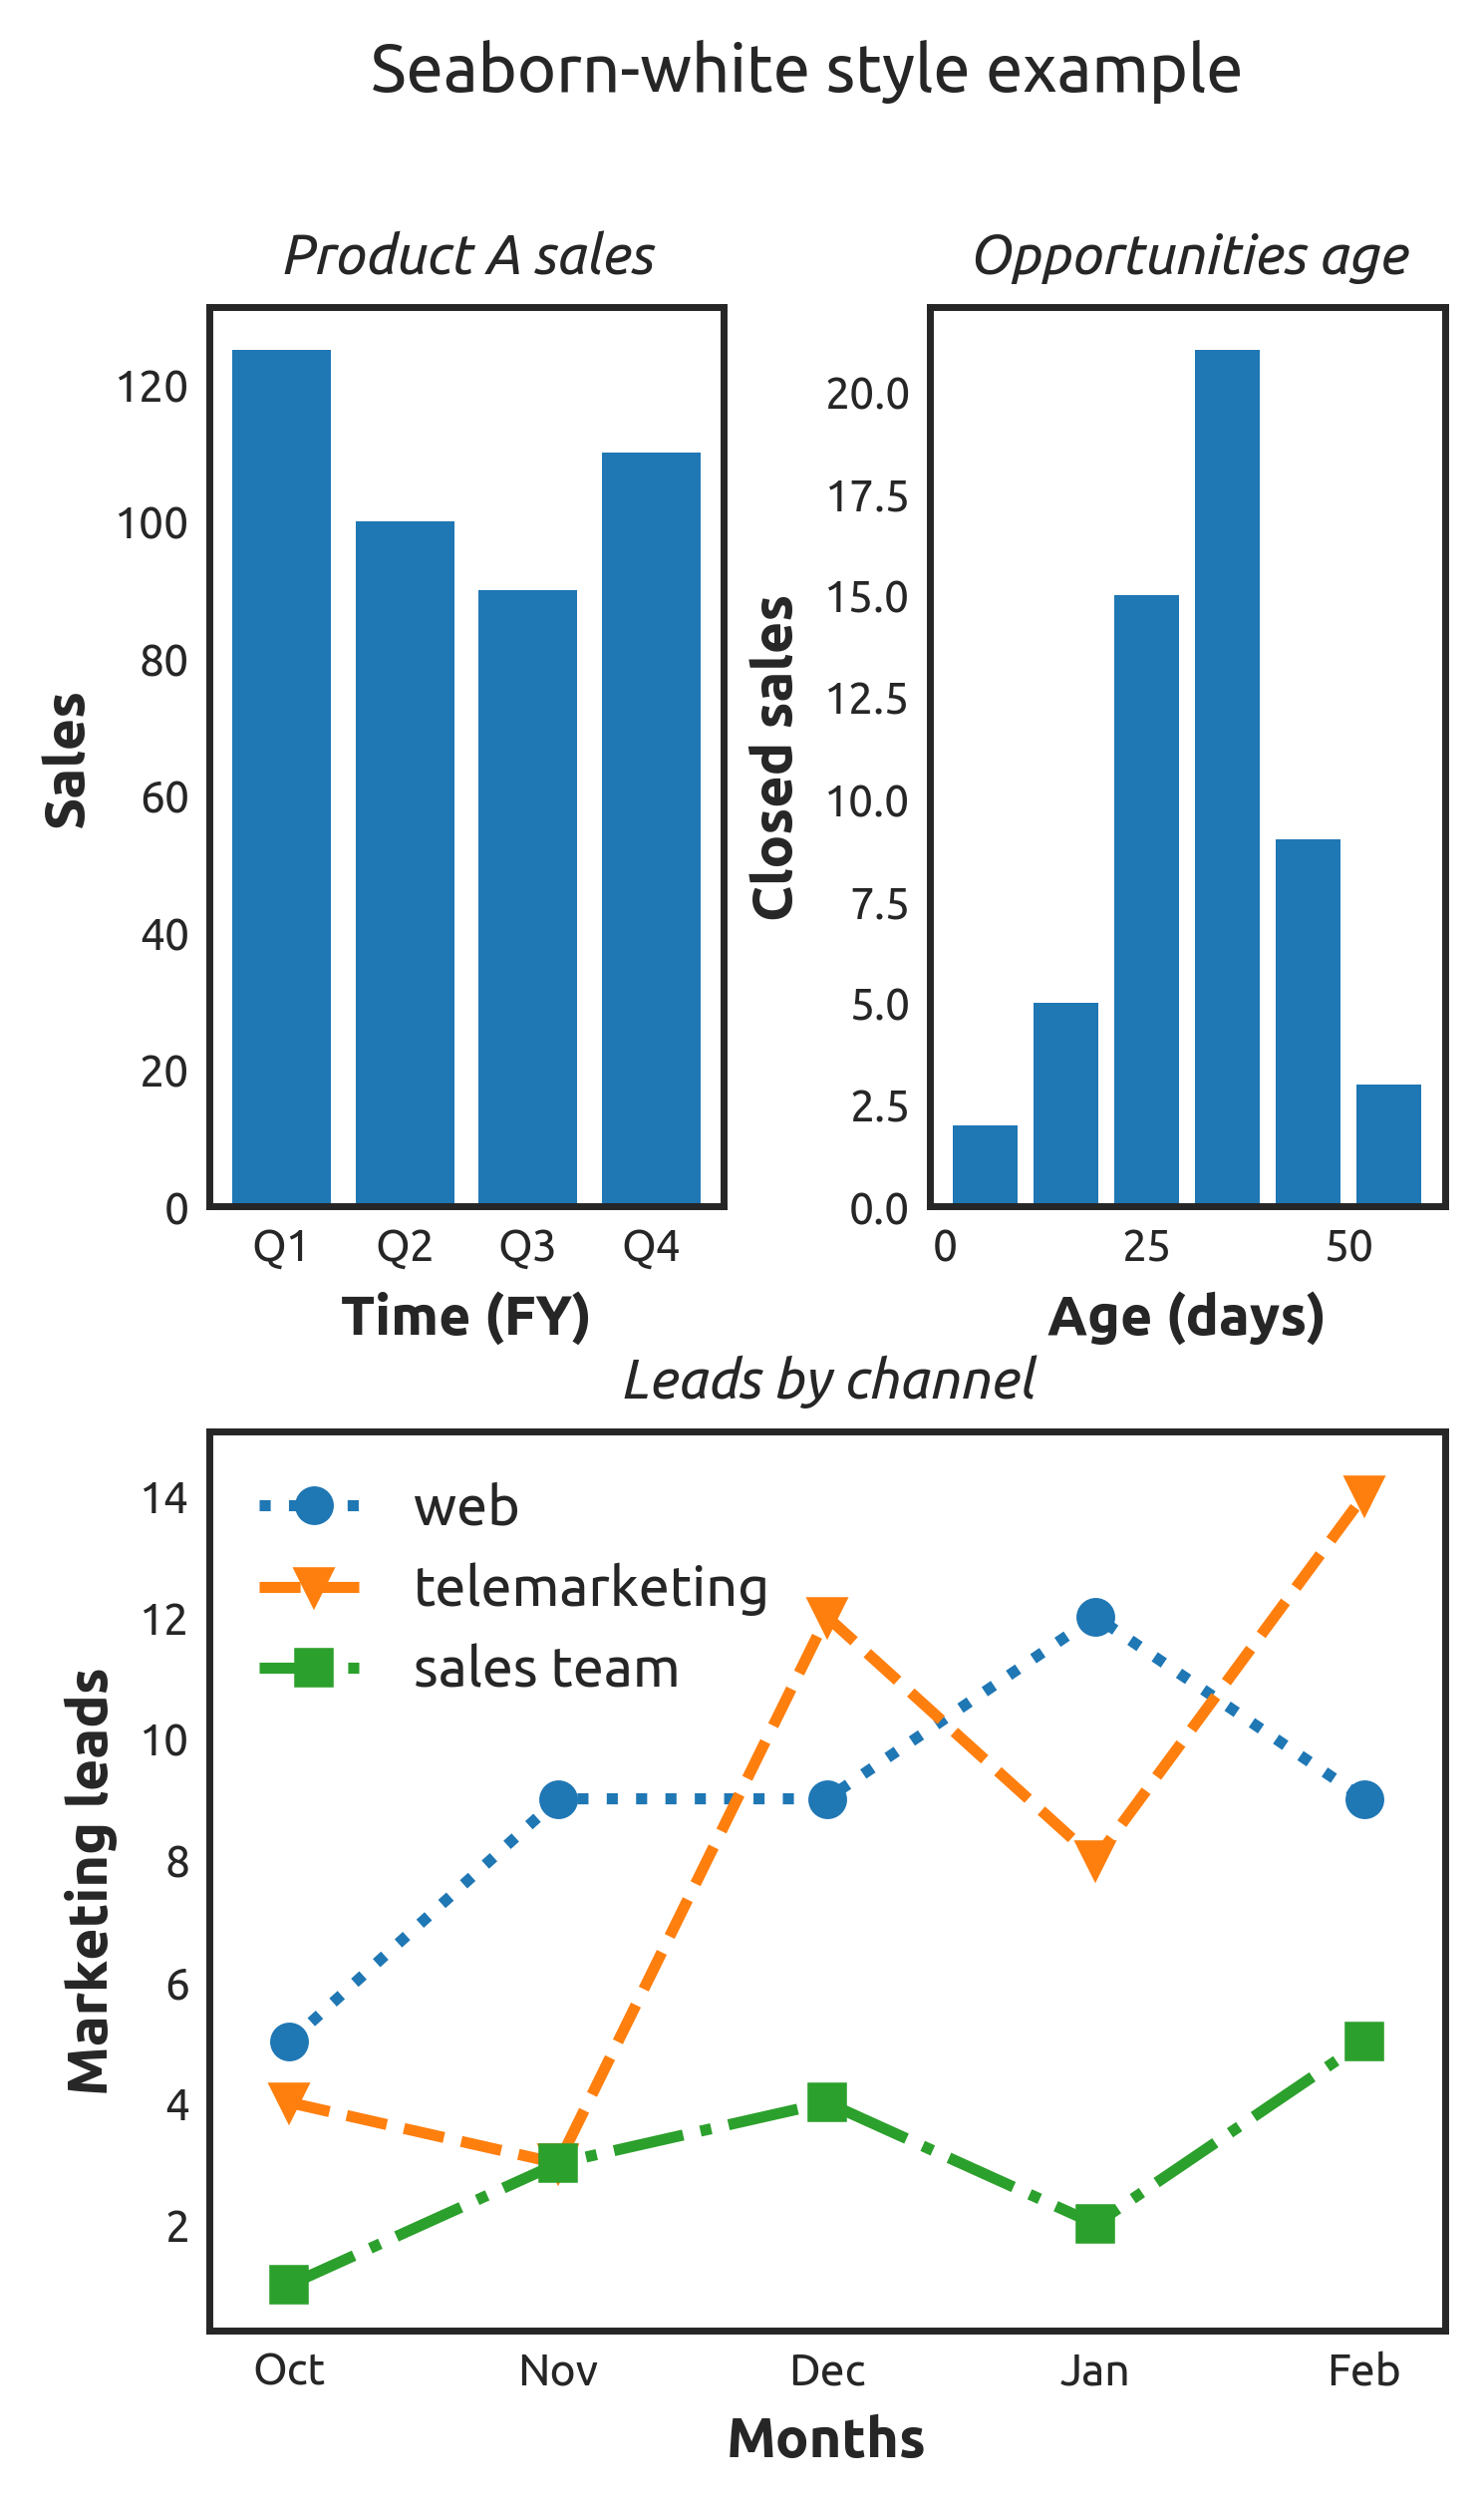

In [4]:
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
width, height = plt.figaspect(1.68)
fig = plt.figure(figsize=(width,height), dpi=400)

# Product sales plot
ax1 = plt.subplot(221)
ax1.bar([1, 2, 3, 4], [125, 100, 90, 110], label="Product A", width=0.8,
            align='center')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Time (FY)')
plt.ylabel('Sales')
# Font style isn't accessible through rcParams
ax1.set_title("Product A sales", fontstyle='italic')

# Opportunities by age plot
ax2 = plt.subplot(222)
population_ages = [1,2,
                   10,11,13,14,14,
                   20,20,21,21,22,22,22,23,25,25,25,25,25,27,27,
                   30,30,30,31,32,32,32,33,33,33,33,34,34,34,34,34,34,36,37,38,39,
                   41,41,42,42,42,43,45,45,49,
                   55,57,59,
                   72,]
bins = [0,10,20,30,40,50,60]
ax2.hist(population_ages, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Age (days)')
plt.ylabel('Closed sales')
ax2.set_title('Opportunities age', fontstyle='italic')

# Marketing channels line plot
ax3 = plt.subplot(2,2,(3,4))
y_series = [1,2,3,4,5]
x_1 = [5,9,9,12,9]
x_2 = [4,3,12,8,14]
x_3 = [1,3,4,2,5]
ax3.plot(y_series, x_1, linewidth=2, linestyle=':', marker='o', label='web')
ax3.plot(y_series, x_2, linewidth=2, linestyle='--', marker='v', label='telemarketing')
ax3.plot(y_series, x_3, linewidth=2, linestyle='-.', marker='s', label='sales team')
plt.xlabel('Months')
plt.ylabel('Marketing leads')
plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
#ax2.tick_params(axis='x', pad=8)
leg=plt.legend(loc='best', numpoints=1, fancybox=True)

# Axes alteration to put zero values inside the figure Axes
# Avoids axis white lines cutting through zero values - fivethirtyeight style
xmin, xmax, ymin, ymax = ax3.axis()
ax3.axis([xmin-0.1, xmax+0.1, ymin-0.1, ymax+0.4])
ax3.set_title('Leads by channel', fontstyle='italic')

# Space plots a bit
plt.subplots_adjust(hspace=0.25, wspace=0.40)

fig.suptitle("Seaborn-white style example")
plt.savefig('seaborn-style.svg', bbox_inches='tight')

# 3 специальные графики

### 3.1 heatmap - для визуализации корреляции признаков, результатов многоклассовой классификации и любых двумерных матриц

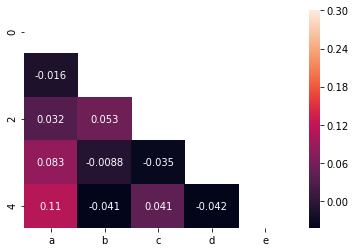

In [55]:
corr = np.corrcoef(np.random.randn(5, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=False, annot=True, 
            xticklabels=["a", "b", "c", "d", "e"], yticklabels=2)
plt.show()

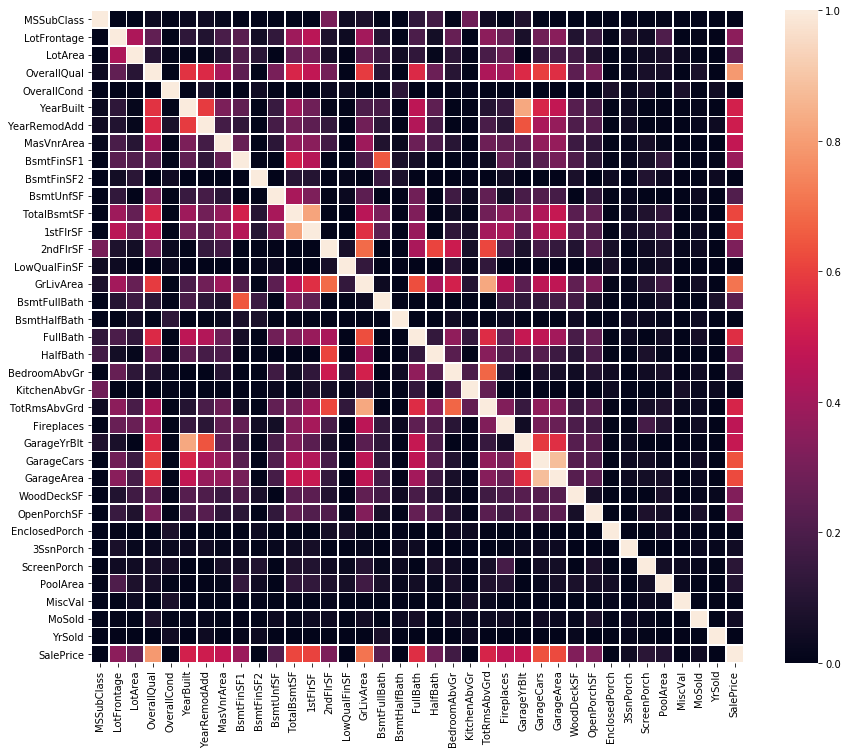

In [61]:
corr = data.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)
plt.show()

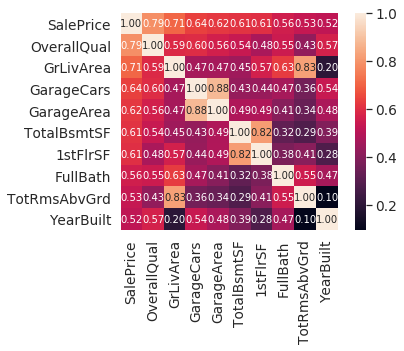

In [63]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 2.2 ящих  усами - визуализация распределений. к примеру распределений признаков. или значений одного признака для разных классов

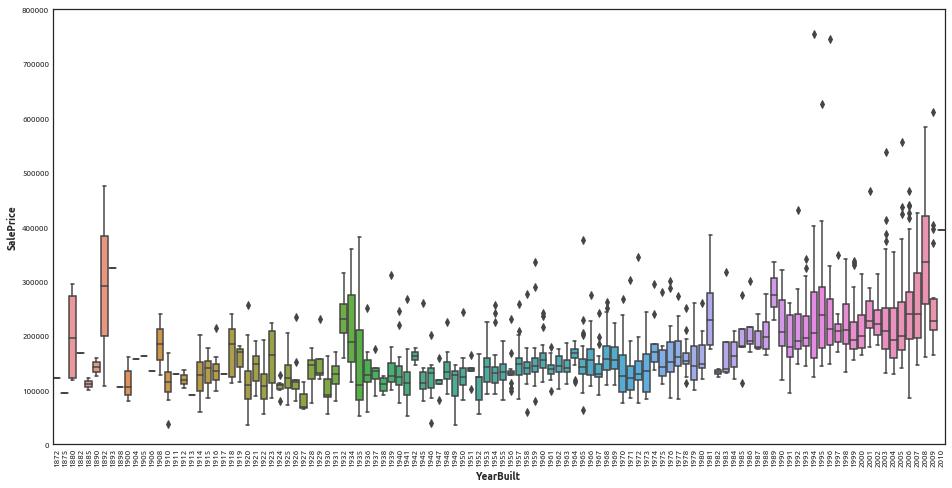

In [12]:
var = 'YearBuilt'
data_for_drow = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data_for_drow)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

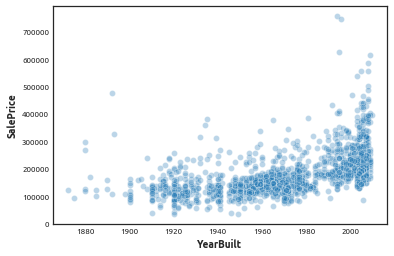

In [27]:
var = 'YearBuilt'
data_for_drow = pd.concat([data['SalePrice'], data[var]], axis=1)
sns.scatterplot(x = "YearBuilt", y = "SalePrice", data=data_for_drow, alpha=0.3, s)

# 4 куда подсматривать за прекрасным

### 4.1  
https://seaborn.pydata.org/

### 4.2 kaggle

выбираешь соревнование по своей тематике (признаки, изображения, тексты, временные ряды)

и смотришь готовые ноутбуки с тегом - data visualisation

пример:
    https://www.kaggle.com/chewzy/santa-finances-a-closer-look-at-the-costs/comments
    

### 4.3